In [1]:
import numpy as np
from sklearn.inspection import PartialDependenceDisplay
from sklearn.base import BaseEstimator, RegressorMixin
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [6]:
class SRModel(BaseEstimator, RegressorMixin):
    def __init__(self, f):
        self.f = f
    def fit(self, X, y):
        self.is_fitted_ = True
        return self
    def predict(self, X):
        return self.f(X)


In [64]:
def plotPDP(fname, model0, Xt, ix, oname):
    f = open(fname)
    models = list(map(lambda x: x.split(", "), f.readlines()))
    f.close()

    def model1(x):
        return eval(models[-1][1])

    def model2(x):
        return eval(models[-2][1])

    def model3(x):
        return eval(models[-3][1])

    m0 = SRModel(model0)
    m1 = SRModel(model1)
    m2 = SRModel(model2)
    m3 = SRModel(model3)

    m0.fit(None, None)
    m1.fit(None, None)
    m2.fit(None, None)
    m3.fit(None, None)

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
    p0=PartialDependenceDisplay.from_estimator(m0, Xt, [ix], ax=ax1, line_kw={"color": "black"}, feature_names=["x","y"]);
    p1=PartialDependenceDisplay.from_estimator(m1, Xt, [ix], ax=ax2, line_kw={"color": "red"}, feature_names=["x","y"]);
    p2=PartialDependenceDisplay.from_estimator(m2, Xt, [ix], ax=ax3, line_kw={"color": "green"}, feature_names=["x","y"]);
    p3=PartialDependenceDisplay.from_estimator(m3, Xt, [ix], ax=ax4, line_kw={"color": "blue"}, feature_names=["x","y"]);

    ax1.set_title("Original");
    ax2.set_title(f"NMSE = {models[-1][0]}");
    ax3.set_title(f"NMSE = {models[-2][0]}");
    ax4.set_title(f"NMSE = {models[-3][0]}");
    plt.savefig(oname, bbox_inches='tight')

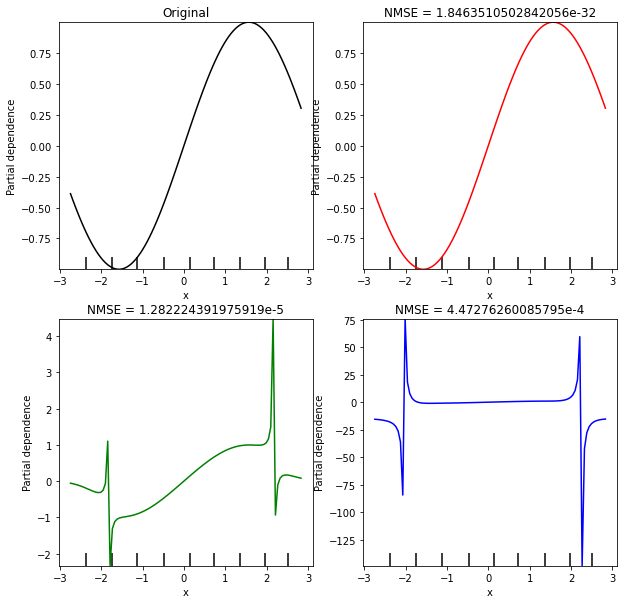

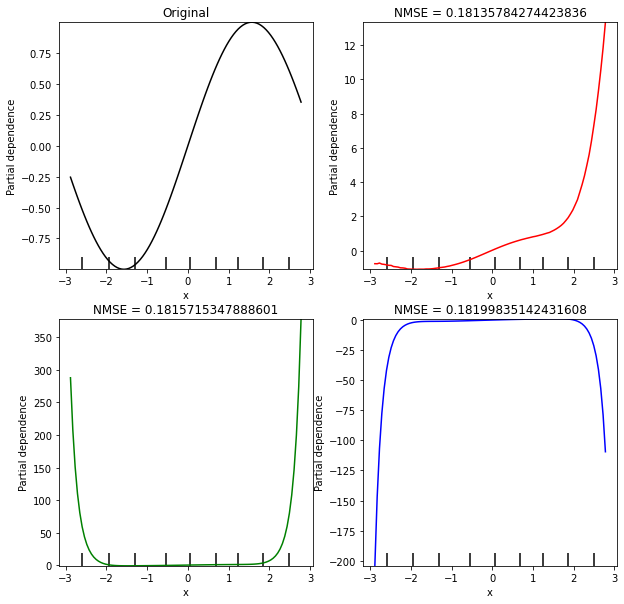

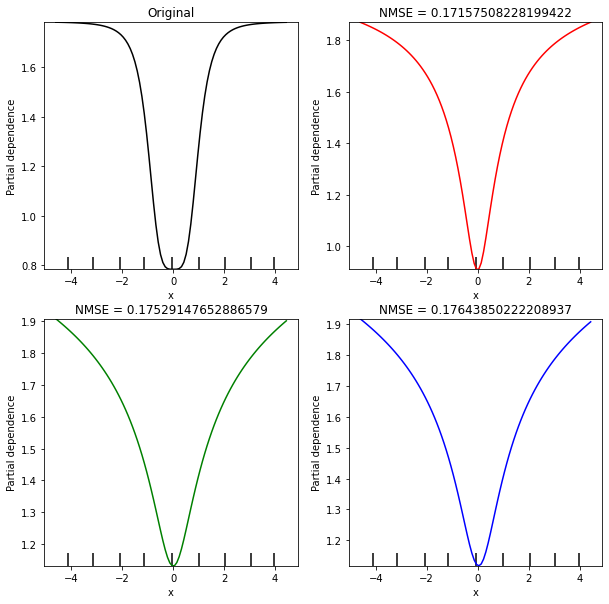

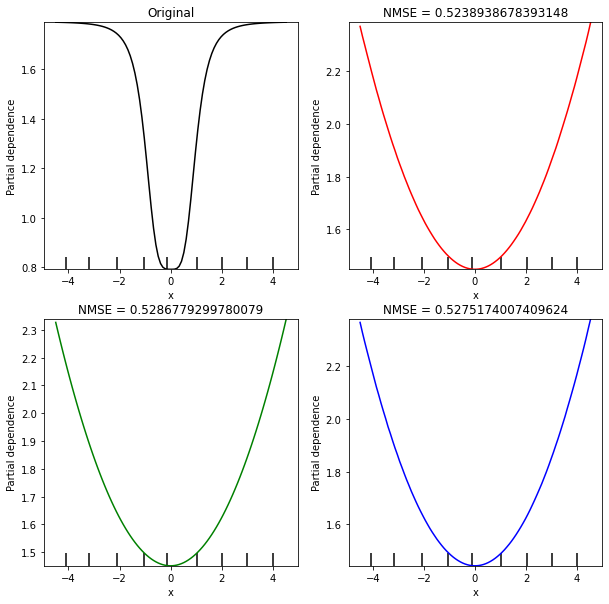

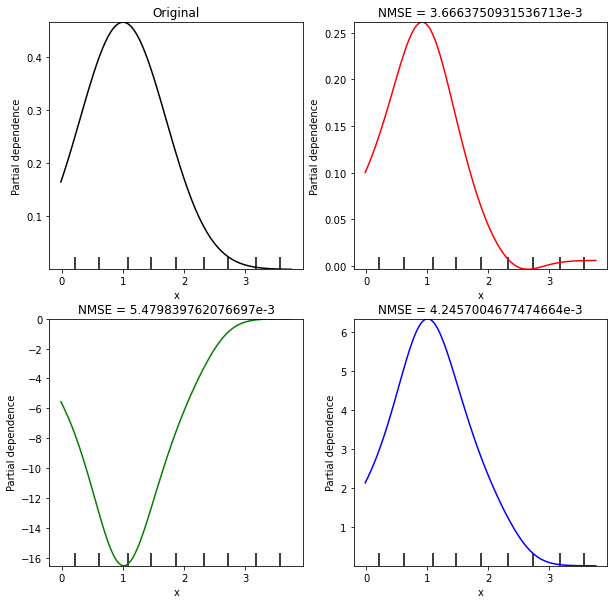

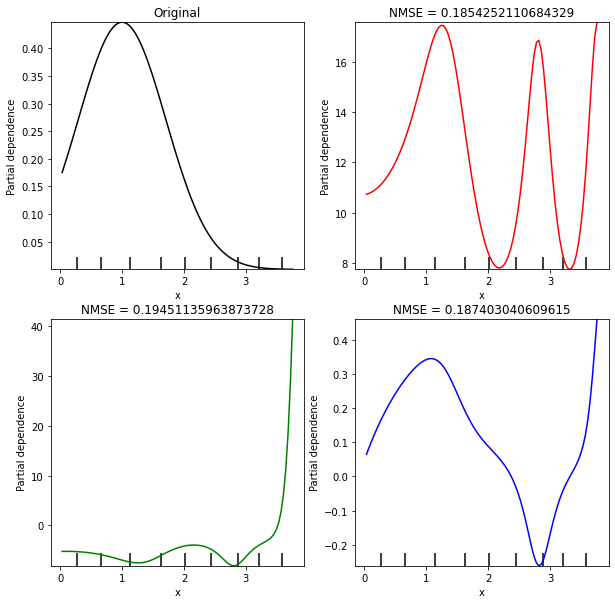

In [62]:
def model0_sin(x):
    return np.sin(x)
def model0_pagie(x):
    return 1/(1 + x[:,0]**(-4)) + 1/(1 + x[:,1]**(-4))
def model0_kotanchek(x):
    return np.exp(-(x[:,0]-1)**2)/(1.2 + (x[:,1]-2.5)**2)

plotPDP("../log/sin_FS_outer/front.csv", model0_sin, np.random.uniform([-np.pi], [np.pi], (1000,1)), 0, "sin_PDP.pdf")
plotPDP("../log/sin_FS_noise_outer/front.csv", model0_sin, np.random.uniform([-np.pi], [np.pi], (1000,1)), 0, "sin_noise_PDP.pdf")
plotPDP("../log/pagie_FS_outer/front.csv", model0_pagie, np.random.uniform([-5, -5], [5, 5], (1000,2)), 0, "pagie_PDP.pdf")
plotPDP("../log/pagie_FS_noise_outer/front.csv", model0_pagie, np.random.uniform([-5, -5], [5, 5], (1000,2)), 0, "pagie_noise_PDP.pdf")
plotPDP("../log/kotanchek_FS_outer/front.csv", model0_kotanchek, np.random.uniform([-0.2, -0.2], [4, 4], (1000,2)), 0, "kotanchek_PDP.pdf")
plotPDP("../log/kotanchek_FS_noise_outer/front.csv", model0_kotanchek, np.random.uniform([-0.2, -0.2], [4, 4], (1000, 2)), 0, "kotanchek_noise_PDP.pdf")

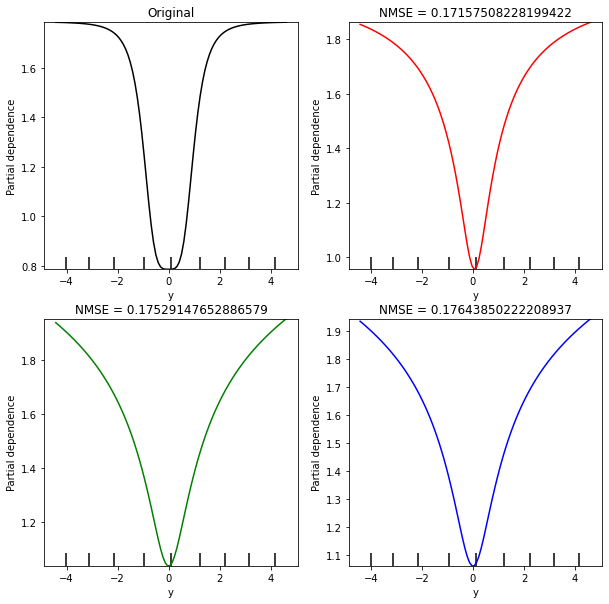

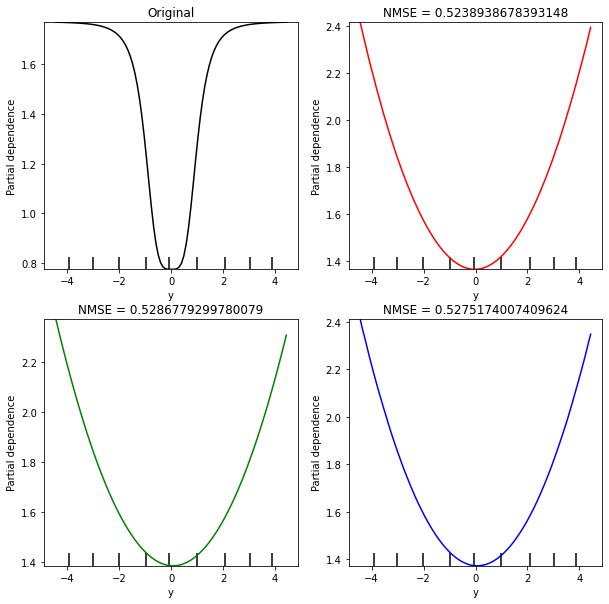

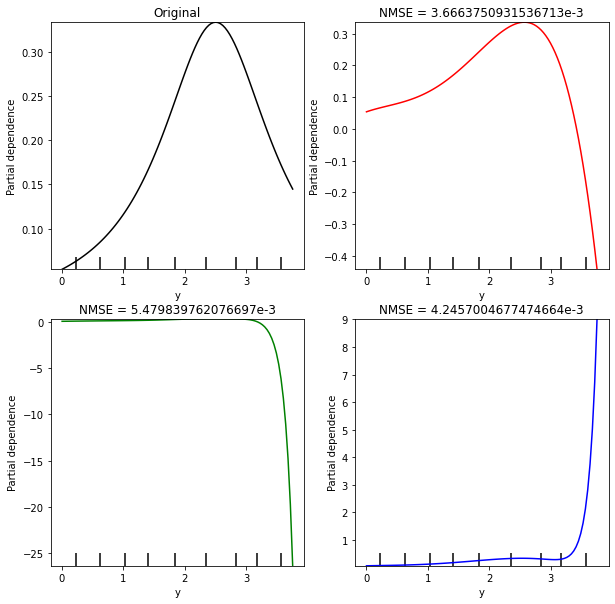

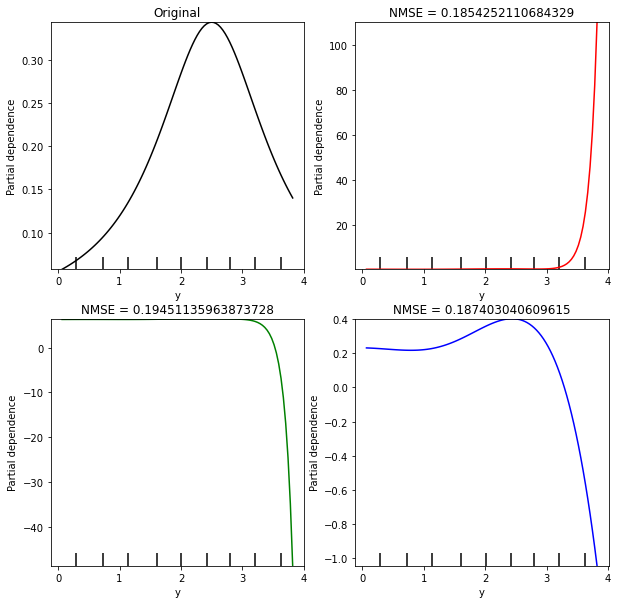

In [65]:
plotPDP("../log/pagie_FS_outer/front.csv", model0_pagie, np.random.uniform([-5, -5], [5, 5], (1000,2)), 1, "pagie_y_PDP.pdf")
plotPDP("../log/pagie_FS_noise_outer/front.csv", model0_pagie, np.random.uniform([-5, -5], [5, 5], (1000,2)), 1, "pagie_noise_y_PDP.pdf")
plotPDP("../log/kotanchek_FS_outer/front.csv", model0_kotanchek, np.random.uniform([-0.2, -0.2], [4, 4], (1000,2)), 1, "kotanchek_y_PDP.pdf")
plotPDP("../log/kotanchek_FS_noise_outer/front.csv", model0_kotanchek, np.random.uniform([-0.2, -0.2], [4, 4], (1000, 2)), 1, "kotanchek_noise_y_PDP.pdf")